In this notebook I want to start looking at what heros are played by the different teams/regions.

In [1]:
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("seaborn-ticks")
plt.rcParams.update({'font.size':16})

In [2]:
# outline
# loop over every game
# get a list of teams and append the heros to it

## dev

In [3]:
with open("match_data/WEU/6299611972.json") as f:
    data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'match_data/WEU/6299231379.json'

In [ ]:
# It's unix epoch in milliseconds
# Noxville
data['data']['start_date']

1638295740000

In [8]:
# https://stackoverflow.com/questions/21787496/converting-epoch-time-with-milliseconds-to-datetime
import datetime
s = data['data']['start_date'] / 1000.0
datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')

'2021-11-30 18:09:00.000000'

In [9]:
def from_unix_epoch_ms_to_datetime(s):
    s = s/1000.0
    return datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')

In [10]:
from_unix_epoch_ms_to_datetime(data['data']['start_date'])

'2021-11-30 18:09:00.000000'

In [11]:
pd.to_datetime(from_unix_epoch_ms_to_datetime(data['data']['start_date']))

Timestamp('2021-11-30 18:09:00')

In [12]:
list(data['data'].keys())

['channels',
 'derived_series',
 'dire',
 'duration',
 'has_error',
 'league',
 'match_id',
 'patch',
 'radiant',
 'radiant_victory',
 'rating_shifts',
 'replay_info',
 'start_date',
 'state']

In [13]:
data['data']['start_date']

1638295740000

In [14]:
list(data['data']['radiant'].keys())

['player_performances', 'team']

In [15]:
list(data['data']['radiant']['team'])

['display', 'logo', 'name', 'tag', 'valve_id']

In [16]:
data['data']['radiant']['team']['name']

'Team Secret'

In [17]:
list(data['data']['radiant']['player_performances'])[0].keys()

dict_keys(['laneInfo', 'performance', 'player'])

In [18]:
data['data']['radiant']['player_performances'][0]['performance']['hero']

{'short_name': 'ancientapparition', 'valve_id': 68}

In [19]:
[d['performance']['hero']['short_name'] for d in data['data']['radiant']['player_performances']]

['ancientapparition',
 'voidspirit',
 'phantomassassin',
 'monkey_king',
 'pangolier']

In [20]:
def get_dire_heros_from_json(json_file):
    return [d['performance']['hero']['short_name'] for d in data['data']['dire']['player_performances']]

In [21]:
get_dire_heros_from_json(data)

['shadowdemon', 'mars', 'emberspirit', 'templarassassin', 'darkwillow']

In [22]:
class Match(object):
    def __init__(self, filename):
        self.filename = filename
        with open(self.filename) as f:
            self.data = json.load(f)
    
        self.datetime = self.get_match_date()
    
        self.dire_team = self.get_dire_team()
        self.dire_heroes = self.get_dire_heroes()
        self.dire_heroes_id = self.get_dire_heroes_id()
        self.radiant_team = self.get_radiant_team()
        self.radiant_heroes = self.get_radiant_heroes()
        self.radiant_heroes_id = self.get_radiant_heroes_id()
        
        
        self.df = pd.DataFrame({
            'datetime':self.datetime,
            'radiant_heroes_id': self.radiant_heroes_id,
            'radiant_heroes': self.radiant_heroes,
            'dire_heroes_id': self.dire_heroes_id,
            'dire_heroes': self.dire_heroes,
        })
    
    def __repr__(self):
        return f"""match file: {self.filename}:\n match date: {self.datetime}\n dire team: {self.dire_team}\n radiant team: {self.radiant_team}"""
    
    def __str__(self):
        return self.__repr__()
    
    def get_match_date(self):
        return pd.to_datetime(from_unix_epoch_ms_to_datetime(self.data['data']['start_date']))
            
    def get_dire_team(self):
        return self.data['data']['dire']['team']['name'], self.data['data']['dire']['team']['valve_id']
    
    def get_radiant_team(self):
        return self.data['data']['radiant']['team']['name'], self.data['data']['dire']['team']['valve_id']
            
    def get_dire_heroes(self):
        return [d['performance']['hero']['short_name'] for d in self.data['data']['dire']['player_performances']]
    
    def get_radiant_heroes(self):
        return [d['performance']['hero']['short_name'] for d in self.data['data']['radiant']['player_performances']]

    def get_dire_heroes_id(self):
        return [d['performance']['hero']['valve_id'] for d in self.data['data']['dire']['player_performances']]
    
    def get_radiant_heroes_id(self):
        return [d['performance']['hero']['valve_id'] for d in self.data['data']['radiant']['player_performances']]

In [24]:
m = Match("match_data/WEU/6299611972.json")

In [25]:
m

match file: match_data/WEU/6299611972.json:
 match date: 2021-11-30 18:09:00
 dire team: ('OG', 2586976)
 radiant team: ('Team Secret', 2586976)

In [26]:
m.df

datetime  radiant_heroes_id     radiant_heroes  dire_heroes_id  \
0 2021-11-30 18:09:00                 68  ancientapparition              79   
1 2021-11-30 18:09:00                126         voidspirit             129   
2 2021-11-30 18:09:00                 44    phantomassassin             106   
3 2021-11-30 18:09:00                114        monkey_king              46   
4 2021-11-30 18:09:00                120          pangolier             119   

       dire_heroes  
0      shadowdemon  
1             mars  
2      emberspirit  
3  templarassassin  
4       darkwillow

In [27]:
m.datetime

Timestamp('2021-11-30 18:09:00')

In [28]:
np.array(m.dire_heroes_id)[:,np.newaxis]

array([[ 79],
       [129],
       [106],
       [ 46],
       [119]])

In [29]:
m.get_dire_heroes()

['shadowdemon', 'mars', 'emberspirit', 'templarassassin', 'darkwillow']

In [30]:
m.get_radiant_heroes()

['ancientapparition',
 'voidspirit',
 'phantomassassin',
 'monkey_king',
 'pangolier']

In [31]:
m.get_dire_team()

('OG', 2586976)

In [32]:
m.get_radiant_team()

('Team Secret', 2586976)

In [33]:
filenames = glob.glob("match_data/*/*")

In [34]:
ms=[Match(filename=filename) for filename in filenames]

In [35]:
ms[30]

match file: match_data/NA/6328618711.json:
 match date: 2021-12-18 23:02:08
 dire team: ('Evil Geniuses', 39)
 radiant team: ('Simply TOOBASED', 39)

In [36]:
ms[4].get_radiant_team()

('Undying', 7390454)

In [37]:
ms[4].radiant_heroes_id

[65, 38, 88, 3, 10]

In [38]:
ms[4].radiant_heroes

['batrider', 'beastmaster', 'nyxassassin', 'bane', 'morphling']

In [39]:
for m in ms:
    assert len(m.get_radiant_heroes()) == 5

In [40]:
for m in ms:
    assert len(m.get_dire_heroes()) == 5

In [41]:
ms[0].df.set_index("datetime")

radiant_heroes_id    radiant_heroes  dire_heroes_id  \
datetime                                                                   
2021-12-18 21:57:09                128          snapfire               6   
2021-12-18 21:57:09                  3              bane              63   
2021-12-18 21:57:09                 48              luna              28   
2021-12-18 21:57:09                 23            kunkka             106   
2021-12-18 21:57:09                108  abyssalunderlord              91   

                     dire_heroes  
datetime                          
2021-12-18 21:57:09   drowranger  
2021-12-18 21:57:09       weaver  
2021-12-18 21:57:09      slardar  
2021-12-18 21:57:09  emberspirit  
2021-12-18 21:57:09         wisp

In [42]:
ms[0].df

datetime  radiant_heroes_id    radiant_heroes  dire_heroes_id  \
0 2021-12-18 21:57:09                128          snapfire               6   
1 2021-12-18 21:57:09                  3              bane              63   
2 2021-12-18 21:57:09                 48              luna              28   
3 2021-12-18 21:57:09                 23            kunkka             106   
4 2021-12-18 21:57:09                108  abyssalunderlord              91   

   dire_heroes  
0   drowranger  
1       weaver  
2      slardar  
3  emberspirit  
4         wisp

In [43]:
master_df = pd.concat([m.df for m in ms], axis=0)

In [44]:
# master_df['datetime'] = master_df['datetime'].dt.date

In [45]:
master_df.set_index("datetime").groupby(pd.Grouper(freq='D')).count()

radiant_heroes_id  radiant_heroes  dire_heroes_id  dire_heroes
datetime                                                                  
2021-11-30                  5               5               5            5
2021-12-01                 25              25              25           25
2021-12-02                 25              25              25           25
2021-12-03                 30              30              30           30
2021-12-04                 60              60              60           60
2021-12-05                 55              55              55           55
2021-12-06                  5               5               5            5
2021-12-07                 35              35              35           35
2021-12-08                 55              55              55           55
2021-12-09                 45              45              45           45
2021-12-10                 25              25              25           25
2021-12-11                 70              70              70           70
2021-12-12                 50              50              50           50
2021-12-13                 10              10              10           10
2021-12-14                 30              30              30           30
2021-12-15                 35              35              35           35
2021-12-16                 45              45              45           45
2021-12-17                 30              30              30           30
2021-12-18                 70              70              70           70
2021-12-19                 45              45              45           45
2021-12-20                 10              10              10           10
2021-12-21                 40              40              40           40
2021-12-22                  0               0               0            0
2021-12-23                  0               0               0            0
2021-12-24                  0               0               0            0
2021-12-25                  0               0               0            0
2021-12-26                  0               0               0            0
2021-12-27                  0               0               0            0
2021-12-28                  0               0               0            0
2021-12-29                  0               0               0            0
2021-12-30                  0               0               0            0
2021-12-31                  0               0               0            0
2022-01-01                  0               0               0            0
2022-01-02                  0               0               0            0
2022-01-03                 25              25              25           25
2022-01-04                 40              40              40           40
2022-01-05                 50              50              50           50
2022-01-06                 55              55              55           55
2022-01-07                 55              55              55           55
2022-01-08                 80              80              80           80
2022-01-09                 85              85              85           85
2022-01-10                 30              30              30           30
2022-01-11                 65              65              65           65
2022-01-12                 45              45              45           45
2022-01-13                 35              35              35           35
2022-01-14                 55              55              55           55

In [46]:
master_dfdf = master_df.set_index('datetime')

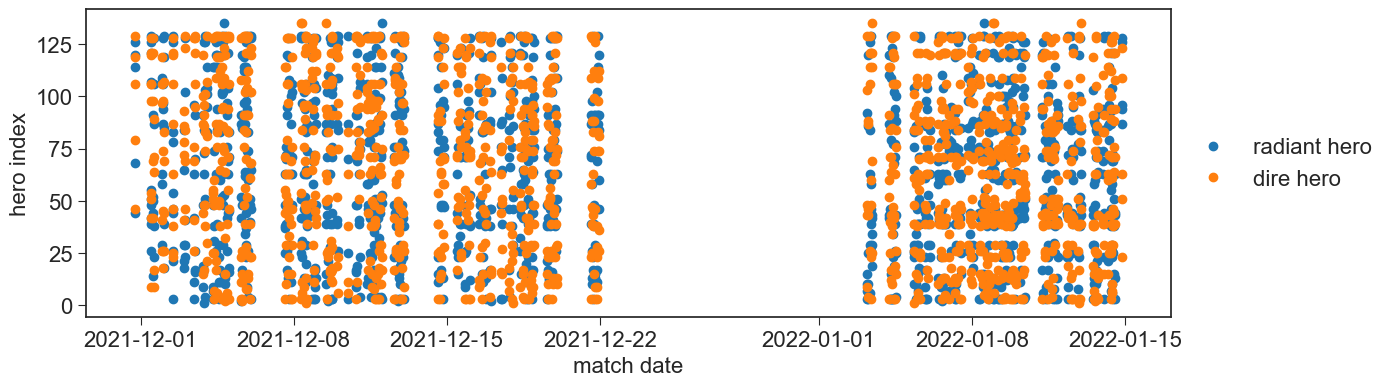

In [47]:
# plt.figure(figsize=(4,8))
plt.figure(figsize=(14,4))
plt.plot_date(master_df['datetime'], master_df['radiant_heroes_id'], label='radiant hero')
plt.plot_date(master_df['datetime'], master_df['dire_heroes_id'], label='dire hero')
plt.xlabel("match date")
plt.ylabel("hero index")
# plt.xlim(pd.to_datetime('2021-12-01'), pd.to_datetime('2021-12-02'))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()

In [48]:
##
## get the map from hero index to hero name
##
# from bs4 import BeautifulSoup
# from urllib.request import urlopen
# import json
# # %%
# # %%
# url = "http://datdota.com/api/drafts?default=true"
# # %%
# html = urlopen(url)
# soup = BeautifulSoup(html,"html.parser")
# json_dict = json.loads(str(soup))
# # %%
# print(json_dict.keys())

In [49]:
# len(json_dict['data'])

In [50]:
# json_dict['data'][0]['hero']

In [51]:
# json_dict['data'][0]['heroName']

In [52]:
# hero_map = {}
# for d in json_dict['data']:
#     id_ = d['hero']
#     name_ = d['heroName']
#     hero_map[id_] = name_

In [53]:
# df_hero_map = pd.DataFrame({"idx":hero_map.keys(), "hero": hero_map.values()})

In [54]:
# df_hero_map.to_json("hero_map.json")

In [55]:
df_hero_map = pd.read_json("hero_map.json")

In [56]:
df_hero_map

idx         hero
0    114  Monkey King
1    129         Mars
2     63       Weaver
3     74      Invoker
4     29   Tidehunter
..   ...          ...
116   22         Zeus
117   50       Dazzle
118   80   Lone Druid
119   37      Warlock
120   82        Meepo

[121 rows x 2 columns]

In [57]:
all_radiant_heroes = np.array([m.radiant_heroes_id for m in ms]).reshape(-1)

In [58]:
all_dire_heroes = np.array([m.dire_heroes_id for m in ms]).reshape(-1)

In [59]:
all_heroes = np.concatenate((all_radiant_heroes, all_dire_heroes))

In [60]:
# hero_map

In [61]:
all_heroes[0]

128

In [62]:
df_hero_map.loc[df_hero_map['idx'] == 114, 'hero']

0    Monkey King
Name: hero, dtype: object

In [63]:
df = pd.DataFrame({
    "hero_id":all_heroes,
    "hero_name":[df_hero_map.loc[df_hero_map['idx'] == all_hero, 'hero'].values[0] for all_hero in all_heroes]
})

In [64]:
df

hero_id      hero_name
0         128       Snapfire
1           3           Bane
2          48           Luna
3          23         Kunkka
4         108      Underlord
...       ...            ...
2835       87      Disruptor
2836       49  Dragon Knight
2837       23         Kunkka
2838        3           Bane
2839       10      Morphling

[2840 rows x 2 columns]

In [65]:
df.value_counts().head(20)

hero_id  hero_name       
3        Bane                133
128      Snapfire            105
39       Queen of Pain       103
129      Mars                102
63       Weaver               83
71       Spirit Breaker       78
23       Kunkka               70
91       Io                   63
48       Luna                 62
29       Tidehunter           60
121      Grimstroke           58
26       Lion                 58
42       Wraith King          56
87       Disruptor            56
15       Razor                54
106      Ember Spirit         54
43       Death Prophet        52
46       Templar Assassin     50
84       Ogre Magi            47
74       Invoker              44
dtype: int64

In [66]:
dire_df = master_df[['datetime', 'dire_heroes_id', 'dire_heroes']]
dire_df = dire_df.rename(columns={"dire_heroes_id":'heroes_id', "dire_heroes":"heroes"})

In [67]:
radiant_df = master_df[['datetime', 'radiant_heroes_id', 'radiant_heroes']]
radiant_df = radiant_df.rename(columns={"radiant_heroes_id":'heroes_id', "radiant_heroes":"heroes"})

In [68]:
heroes_df = pd.concat((dire_df, radiant_df), axis=0)
heroes_df['datetime'] = pd.to_datetime(heroes_df['datetime'])
# heroes_df = heroes_df.set_index("datetime")

In [69]:
heroes_df['heroes_id'].unique()

array([  6,  63,  28, 106,  91,  97,  41, 119,  26,  45,  53,  71,  72,
       121, 123,   3,  74,  51, 135,  43,  13,  15,   2, 120,  64,  32,
        29,  52,  10, 128,  84, 129,  39,  69,  44, 107,  83,  94,  55,
        70,  58,  86,  48,  88,  60,  81, 109,   4,  87,   9,  79,  12,
        78,  66,  46,  89,  38,  98,  18,  76,  40,  96,  42, 112,   1,
        17,  23,  36, 114,  34,  75, 104, 126,  65,  49,  11,  47, 100,
        25,  85,  67,  61,  95,  54, 102,  77,  19, 103, 110,  30,  21,
       101,   7,  16,  68,  93,   8, 108,  50,  33,  92,  99, 111,  56,
        20,   5, 105,  31,  27,  35,  73,  14,  37,  62])

In [70]:
heroes_df['heroes_id'].unique().shape

(114,)

In [71]:

mask_picked = df_hero_map['idx'].isin((heroes_df['heroes_id'].unique()))
print("picked")
print(mask_picked.sum())

print("not picked")
print((~mask_picked).sum())
df_hero_map[~mask_picked]

picked
114
not picked
7


idx                 hero
49    90  Keeper of the Light
66    57           Omniknight
113  113           Arc Warden
114   59               Huskar
116   22                 Zeus
118   80           Lone Druid
120   82                Meepo

In [72]:
# maybe I should have a dataframe for each hero

In [73]:
h_dfs = []
for h_idx in heroes_df['heroes_id'].unique():
    _df = heroes_df[heroes_df['heroes_id']==h_idx]
    # _df['datetime'] = pd.to_datetime(_df['datetime'])
    _df = _df.sort_values(by='datetime')
    _df.reset_index(inplace=True, drop=True)
    _df['count'] = 1
    _df['cumsum'] = _df['count'].cumsum()
    h_dfs.append(_df)

In [74]:
# h_dfs[0]['datetime']

In [75]:
h_dfs[0]

datetime  heroes_id      heroes  count  cumsum
0  2021-12-04 12:11:30          6  drowranger      1       1
1  2021-12-04 22:55:07          6  drowranger      1       2
2  2021-12-08 09:23:43          6  drowranger      1       3
3  2021-12-10 00:20:40          6  drowranger      1       4
4  2021-12-10 11:37:26          6  drowranger      1       5
5  2021-12-18 21:57:09          6  drowranger      1       6
6  2022-01-03 08:04:22          6  drowranger      1       7
7  2022-01-05 12:28:06          6  drowranger      1       8
8  2022-01-06 19:48:06          6  drowranger      1       9
9  2022-01-07 04:58:24          6  drowranger      1      10
10 2022-01-08 20:13:20          6  drowranger      1      11
11 2022-01-08 23:48:21          6  drowranger      1      12
12 2022-01-11 06:08:36          6  drowranger      1      13
13 2022-01-14 09:14:38          6  drowranger      1      14
14 2022-01-14 09:43:29          6  drowranger      1      15

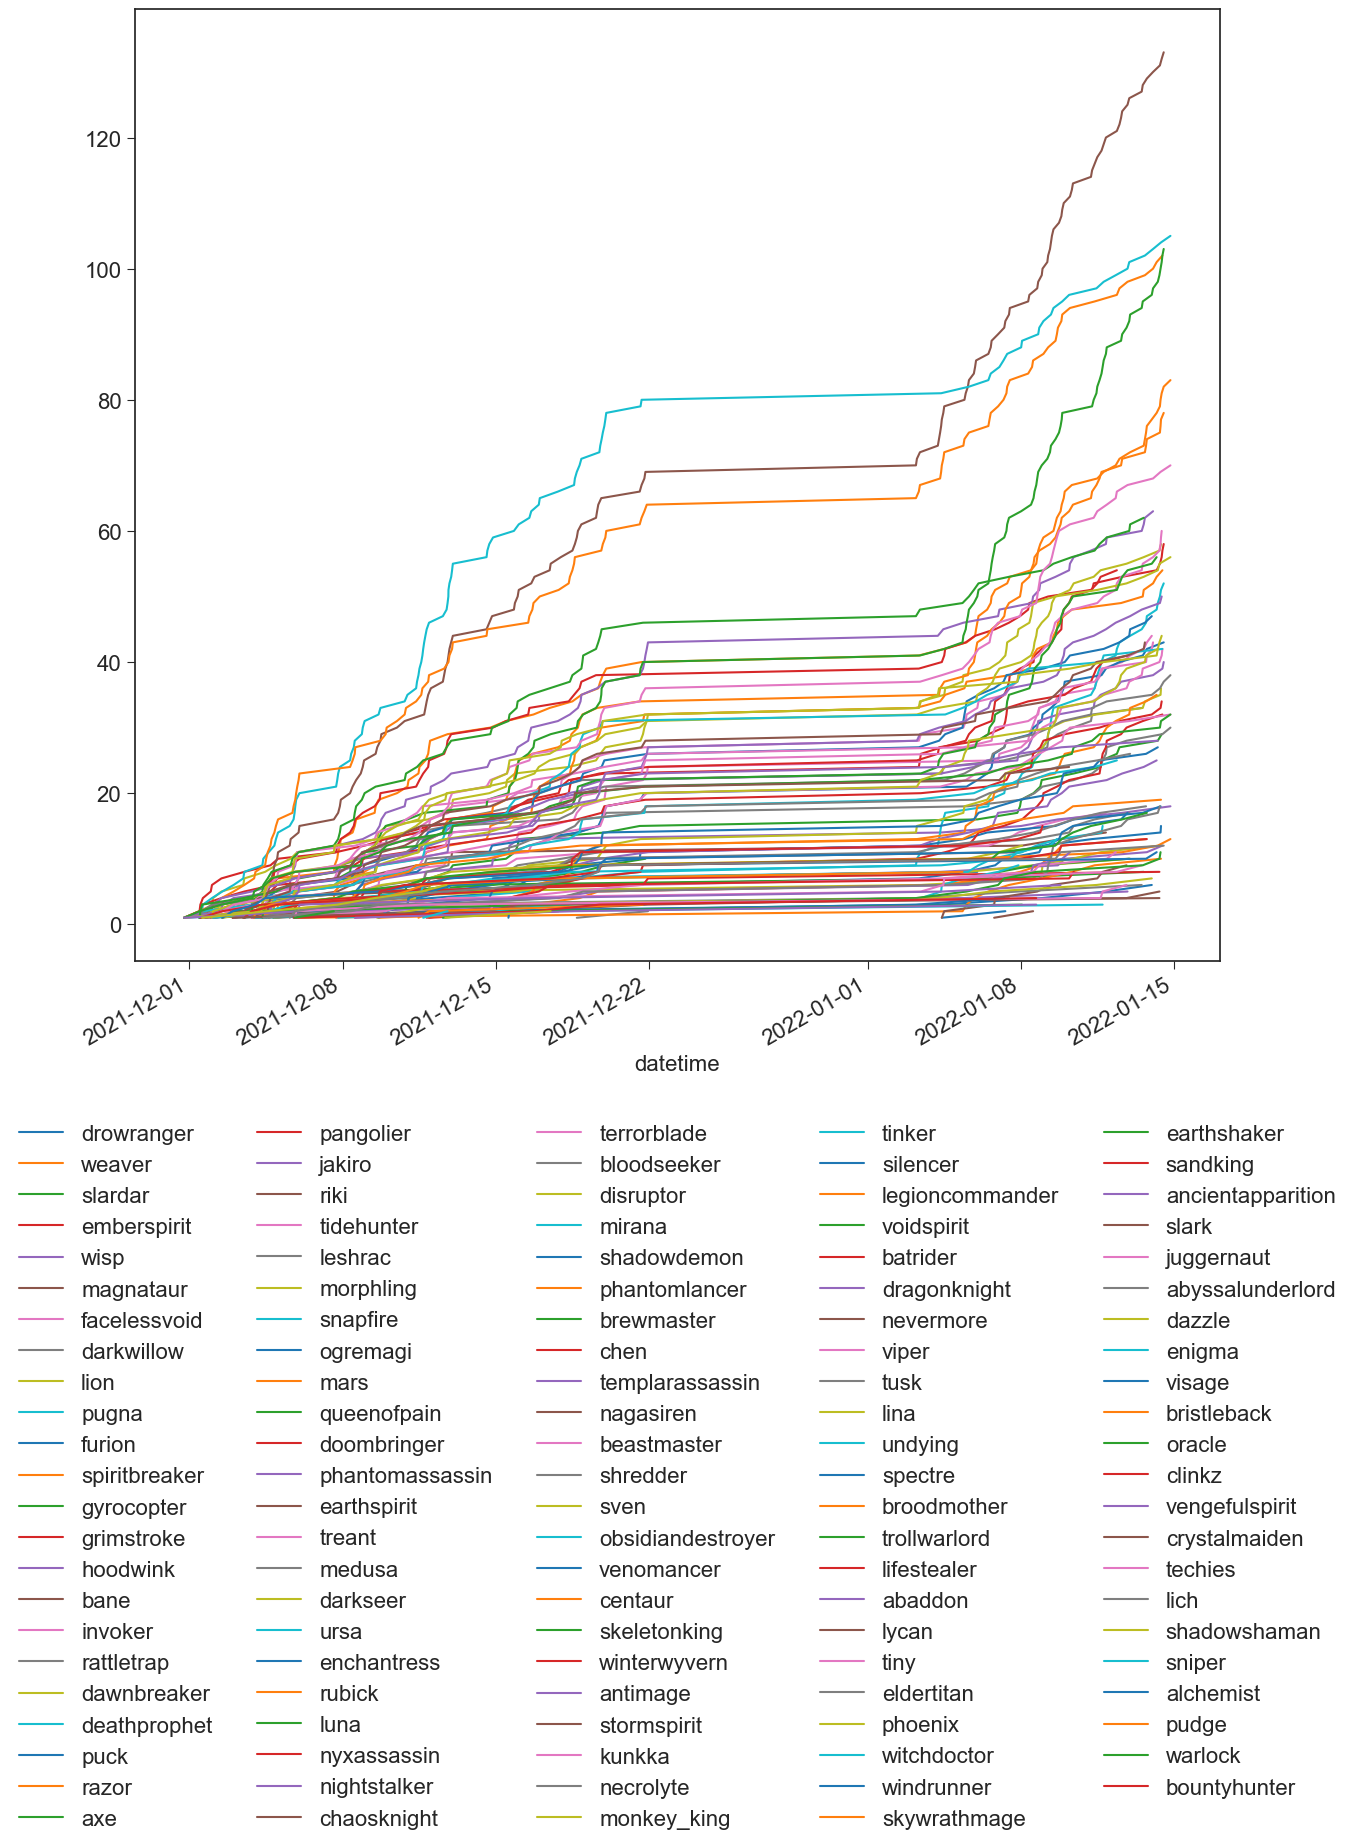

In [76]:
fig, ax = plt.subplots(figsize=(14, 14))
for h_df in h_dfs:
    h_df.plot(x='datetime', y='cumsum', ax=ax, label=h_df['heroes'].values[0])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()